<a href="https://colab.research.google.com/github/tbeucler/2023_MLEES_JB/blob/main/ML_EES/DL/S5_2_CNN_and_EuroSAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Land Use and Land Cover Classification using CNN
![EuroSAT overview image](https://raw.githubusercontent.com/phelber/EuroSAT/master/eurosat_overview_small.jpg)

This notebook is converted from the source, which is a MOOC on TensorFlow: https://www.coursera.org/learn/getting-started-with-tensor-flow2

## Exercise Instruction

Land Use and Land Cover Classification aims to automatically provide labels describing the represented physical land type or how a land area is used (e.g., residential, industrial).   

Convolutional Neural Networks (CNNs),  the state of-the-art image classification method in computer vision and machine learning, have been reported to be suitable for the classification of remotely sensed
images.

However, the classification of remotely sensed images is a challenging task, particularly due to the lack of reliably labeled ground truth datasets.

The [EuroSAT dataset](https://github.com/phelber/EuroSAT) provides large quantity of training data for this purpose. It consists of 27000 labelled Sentinel-2 satellite images of different land uses: residential, industrial, highway, river, forest, pasture, herbaceous vegetation, annual crop, permanent crop and sea/lake.

For a reference, see the following papers:
- Eurosat: A novel dataset and deep learning benchmark for land use and land cover classification. Patrick Helber, Benjamin Bischke, Andreas Dengel, Damian Borth. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 2019.
- Introducing EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification. Patrick Helber, Benjamin Bischke, Andreas Dengel. 2018 IEEE International Geoscience and Remote Sensing Symposium, 2018.





**In this exercise,  we**

1.   Construct CNNs that classifies EuroSAT images into one of its 10 classes;
2.   Saving and loading trained models;
3.   Explore ways to improve the model performance.



In [1]:
# Run this cell first to import all required packages.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.utils import plot_model

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# If you would like to make further imports from tensorflow, add them here



ModuleNotFoundError: No module named 'tensorflow'

## Data Setup

Using the EuroSAT dataset which consists of 27000 images and labels might crash colab due to limited RAM, thus we use a smaller subset of the original dataset - 4000 training images and 1000 testing images with roughly equal numbers of each class.

In [2]:
#DOWNLOAD DATA
!gdown 1qojXiBPdOOkH-kUGxe4vhx20-z7yyq2M

Downloading...
From: https://drive.google.com/uc?id=1qojXiBPdOOkH-kUGxe4vhx20-z7yyq2M
To: /content/data_cnn.zip
100% 55.2M/55.2M [00:01<00:00, 39.8MB/s]


In [3]:
!unzip '/content/data_cnn.zip'

Archive:  /content/data_cnn.zip
   creating: data_cnn/
  inflating: data_cnn/eurosat_overview.jpg  
  inflating: data_cnn/x_test.npy     
  inflating: data_cnn/x_train.npy    
  inflating: data_cnn/y_test.npy     
  inflating: data_cnn/y_train.npy    


In [9]:
# Import the Eurosat data

def load_eurosat_data():
    data_dir = '/content/data_cnn'
    x_train = np.load(os.path.join(data_dir, 'x_train.npy'))
    y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
    x_test  = np.load(os.path.join(data_dir, 'x_test.npy'))
    y_test  = np.load(os.path.join(data_dir, 'y_test.npy'))
    return (x_train, y_train), (x_test, y_test)

(X_train, y_train), (X_test, y_test) = load_eurosat_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

##Q1 Build a CNN

You can now construct a model to fit to the data. Using the Sequential API, build your model according to the following specifications:

* The model should use the input_shape in the function argument to set the input size in the first layer.
* The first layer should be a Conv2D layer with 16 filters, a 3x3 kernel size, a ReLU activation function and 'SAME' padding. Name this layer 'conv_1'.
* The second layer should also be a Conv2D layer with 8 filters, a 3x3 kernel size, a ReLU activation function and 'SAME' padding. Name this layer 'conv_2'.
* The third layer should be a MaxPooling2D layer with a pooling window size of 8x8. Name this layer 'pool_1'.
* The fourth layer should be a Flatten layer, named 'flatten'.
* The fifth layer should be a Dense layer with 32 units, a ReLU activation. Name this layer 'dense_1'.
* The sixth and final layer should be a Dense layer with 10 units and softmax activation. Name this layer 'dense_2'.

In total, the network should have 6 layers.

In [7]:
# Build a Sequential model according to the above specification.
# Ensure the weights are initialised by providing the input_shape argument in the first layer.
input_shape = X_train[0].shape

model1 = Sequential([
        Conv2D(16,(3,3),padding='SAME', activation='relu',input_shape=input_shape,name='conv_1'),
        Conv2D(8,(3,3),padding='SAME', activation='relu',input_shape=input_shape,name='conv_2'),
        MaxPooling2D((8,8),name='pool_1'),
        Flatten(name='flatten'),
        Dense(32, activation='relu',name='dense_1'),
        Dense(10,activation='softmax',name='dense_2')
    ])


##Q2 Compile and evaluate the initial model

* Compile the model with the Adam optimiser, sparse categorical cross entropy loss function, and a single accuracy metric.
* Print the model summary and calculate its initialised test accuracy  
    * What's the initial accuracy & why?

In [ ]:
# Compile the model with the Adam optimiser, sparse categorical cross entropy loss function, and a single accuracy metric.
model1.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
# Print the model summary
model1.summary()


In [ ]:
# Calculate its initialised test accuracy
test_loss, test_acc = model1.evaluate(x=X_test, y=y_test, verbose=1)
print('accuracy: {acc:0.3f}'.format(acc=test_acc))

## Q3 Train and evaluate the model

* Fit the model with 15 epochs;
* Store the fitting result in a variable history;
* Evaluate the fitted model
    * What's the test accuracy after training the model? Does it improve from the initialization?
* Plot the model using [Keras model plotting utilities](https://keras.io/api/utils/model_plotting_utils/)

In [13]:
# Fit the model with 15 epochs and store the fitting result in a variable history.
batch_size = 64
epochs = 15

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/15
63/63 [==============================] - 20s 320ms/step - loss: 0.7620 - accuracy: 0.7287 - val_loss: 0.9518 - val_accuracy: 0.6470
Epoch 2/15
63/63 [==============================] - 18s 282ms/step - loss: 0.7649 - accuracy: 0.7315 - val_loss: 0.8979 - val_accuracy: 0.6760
Epoch 3/15
63/63 [==============================] - 17s 271ms/step - loss: 0.7369 - accuracy: 0.7310 - val_loss: 0.8620 - val_accuracy: 0.6920
Epoch 4/15
63/63 [==============================] - 18s 286ms/step - loss: 0.7313 - accuracy: 0.7372 - val_loss: 0.8910 - val_accuracy: 0.6900
Epoch 5/15
63/63 [==============================] - 19s 304ms/step - loss: 0.7202 - accuracy: 0.7412 - val_loss: 0.8735 - val_accuracy: 0.6670
Epoch 6/15
63/63 [==============================] - 17s 266ms/step - loss: 0.7051 - accuracy: 0.7515 - val_loss: 0.8257 - val_accuracy: 0.7050
Epoch 7/15
63/63 [==============================] - 17s 269ms/step - loss: 0.7164 - accuracy: 0.7380 - val_loss: 0.8243 - val_accuracy: 0.7160

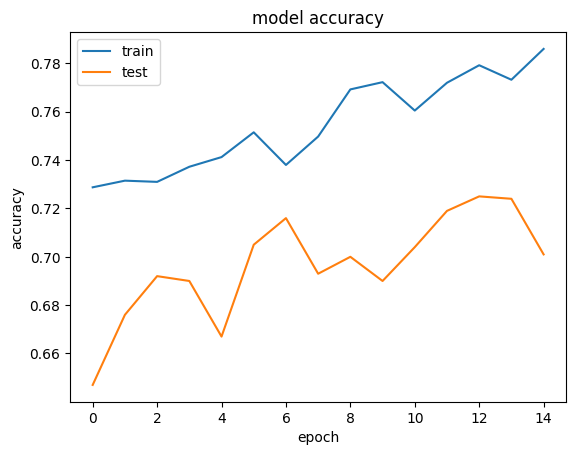

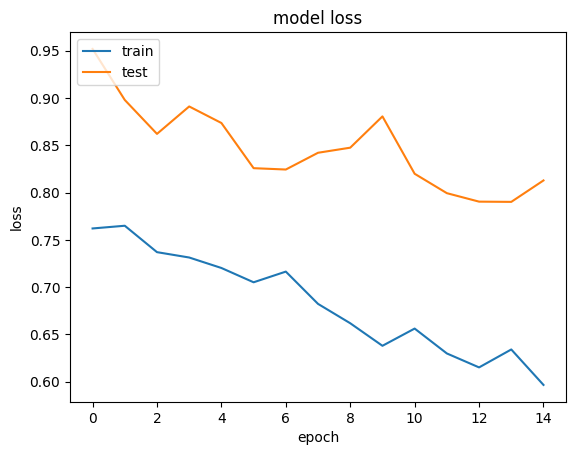

In [14]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_history(history)

In [16]:
# Calculate the test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: {acc:0.3f}'.format(acc=score[1]))

Test accuracy: 0.701


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 8, 8, 8)           0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                16416     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 18354 (71.70 KB)
Trainable params: 18354 (

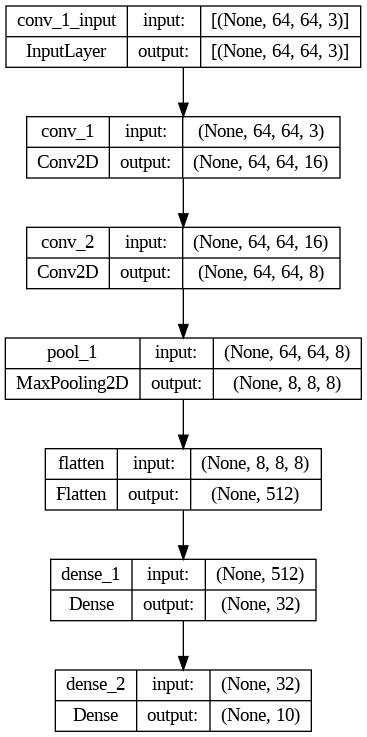

In [18]:
# Plot the model using Keras model plotting utilities
plot_model(model, show_shapes=True, show_layer_names=True)

##Q4 Create checkpoints to save model during training, with a criterion

You will now create three callbacks:
- `checkpoint_every_epoch`: checkpoint that saves the model weights every epoch during training
- `checkpoint_best_only`: checkpoint that saves only the weights with the highest validation accuracy. Use the testing data as the validation data.
- `early_stopping`: early stopping object that ends training if the validation accuracy has not improved in 3 epochs.

In [19]:
# Create a ModelCheckpoint object that:
#     - saves the weights only at the end of every epoch
#     - saves into a directory called 'checkpoints_every_epoch' inside the current working directory
#     - generates filenames in that directory like 'checkpoint_XXX' where
#       XXX is the epoch number formatted to have three digits, e.g. 001, 002, 003, etc.

path_every = 'checkpoints_every_epoch/checkpoint_{epoch:03d}'
checkpoint_every_epoch = ModelCheckpoint(filepath=path,
                           frequency='epoch',
                           save_weights_only=True,
                           verbose=0)



# Create a ModelCheckpoint object that:
#     - saves only the weights that generate the highest validation (testing) accuracy
#     - saves into a directory called 'checkpoints_best_only' inside the current working directory
#     - generates a file called 'checkpoints_best_only/checkpoint'


path_best = 'checkpoints_best_only/checkpoint'
checkpoint_best_only = ModelCheckpoint(filepath=path,
                           frequency='epoch',
                           save_weights_only=True,
                           save_best_only = True,
                           monitor = 'val_accuracy',
                           verbose=1)


In [20]:
# Create an EarlyStopping callback that stops training when
#     the validation (testing) accuracy has not improved in the last 3 epochs.
#     HINT: use the EarlyStopping callback with the correct 'monitor' and 'patience'
#     """
early_stopping = EarlyStopping(monitor='val_accuracy',patience=3, mode='max')

##Q5 Train model using the callbacks

Now, you will train the model using the three callbacks you created. If you created the callbacks correctly, three things should happen:
- At the end of every epoch, the model weights are saved into a directory called `checkpoints_every_epoch`
- At the end of every epoch, the model weights are saved into a directory called `checkpoints_best_only` **only** if those weights lead to the highest test accuracy
- Training stops when the testing accuracy has not improved in three epochs.

You should then have two directories:
- A directory called `checkpoints_every_epoch` containing filenames that include `checkpoint_001`, `checkpoint_002`, etc with the `001`, `002` corresponding to the epoch
- A directory called `checkpoints_best_only` containing filenames that include `checkpoint`, which contain only the weights leading to the highest testing accuracy

In [23]:
# Train model using the callbacks you just created

callbacks = [checkpoint_every_epoch, checkpoint_best_only, early_stopping]
history = model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.7602
Epoch 1: val_accuracy improved from -inf to 0.69700, saving model to checkpoints_best_only/checkpoint
125/125 [==============================] - 17s 138ms/step - loss: 0.6566 - accuracy: 0.7602 - val_loss: 0.8400 - val_accuracy: 0.6970
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 0.6156 - accuracy: 0.7800
Epoch 2: val_accuracy did not improve from 0.69700
125/125 [==============================] - 17s 137ms/step - loss: 0.6156 - accuracy: 0.7800 - val_loss: 0.8496 - val_accuracy: 0.6950
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 0.6078 - accuracy: 0.7797
Epoch 3: val_accuracy improved from 0.69700 to 0.71200, saving model to checkpoints_best_only/checkpoint
125/125 [==============================] - 19s 148ms/step - loss: 0.6078 - accuracy: 0.7797 - val_loss: 0.7982 - val_accuracy: 0.7120
Epoch 4/50
125/125 [==============================] 

##Q6 Create new instance of model and load on both sets of weights

Now you will use the weights you just saved in a fresh model. You should create two functions, both of which take a freshly instantiated model instance:
- `model_last_epoch` should contain the weights from the latest saved epoch
- `model_best_epoch` should contain the weights from the saved epoch with the highest testing accuracy

_Hint: use the_ `tf.train.latest_checkpoint` _function to get the filename of the latest saved checkpoint file. Check the docs_ [_here_](https://www.tensorflow.org/api_docs/python/tf/train/latest_checkpoint).

In [ ]:
# Create a new instance of the CNN you created earlier,
input_shape = x_train[0].shape

model = Sequential([
        Conv2D(16,(3,3),padding='SAME', activation='relu',input_shape=input_shape,name='conv_1'),
        Conv2D(8,(3,3),padding='SAME', activation='relu',input_shape=input_shape,name='conv_2'),
        MaxPooling2D((8,8),name='pool_1'),
        Flatten(name='flatten'),
        Dense(32, activation='relu',name='dense_1'),
        Dense(10,activation='softmax',name='dense_2')
    ])
model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

# Load on the weights from the last training epoch.
model_last_epoch = model.load_weights(tf.train.latest_checkpoint('checkpoints_every_epoch'))

In [33]:
# Create a new instance of the CNN you created earlier,
input_shape = x_train[0].shape

model = Sequential([
        Conv2D(16,(3,3),padding='SAME', activation='relu',input_shape=input_shape,name='conv_1'),
        Conv2D(8,(3,3),padding='SAME', activation='relu',input_shape=input_shape,name='conv_2'),
        MaxPooling2D((8,8),name='pool_1'),
        Flatten(name='flatten'),
        Dense(32, activation='relu',name='dense_1'),
        Dense(10,activation='softmax',name='dense_2')
    ])
model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

# Load the weights leading to the highest validation accuracy.
#     """
model_best_epoch = model.load_weights('checkpoints_best_only/checkpoint')

In [34]:
# Verify that the accuarcy of the last and model model.

score = model_last_epoch.evaluate(X_test, y_test, verbose=0)
print('Model with last epoch weights: {acc:0.3f}'.format(acc=score[1]))
print('')

score = model_best_epoch.evaluate(X_test, y_test, verbose=0)
print('Model with best epoch weights: {acc:0.3f}'.format(acc=score[1]))

Test accuracy: 0.739


## Q7 Explore to improve the model performance by changing the model structure
* Change the convolution layer parameters
* Add Dropout layers

In [37]:
# Build a Sequential model model2 with same specification as the previous model1,
# but change the number of filters in the first convolution layer to 32 and second convolution layer to 64.
# Also add two dropout layers - one after the max pooling layer, one before the final dense layer.
# Ensure the weights are initialised by providing the input_shape argument in the first layer.
input_shape = X_train[0].shape

model2 = Sequential([
        Conv2D(32,(3,3),padding='SAME', activation='relu',input_shape=input_shape,name='conv_1'),
        Conv2D(64,(3,3),padding='SAME', activation='relu',input_shape=input_shape,name='conv_2'),
        MaxPooling2D((8,8),name='pool_1'),
        Dropout(0.2),
        Flatten(name='flatten'),
        Dense(256, activation='relu',name='dense_1'),
        Dropout(0.2),
        Dense(10,activation='softmax',name='dense_2')
    ])
model2.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

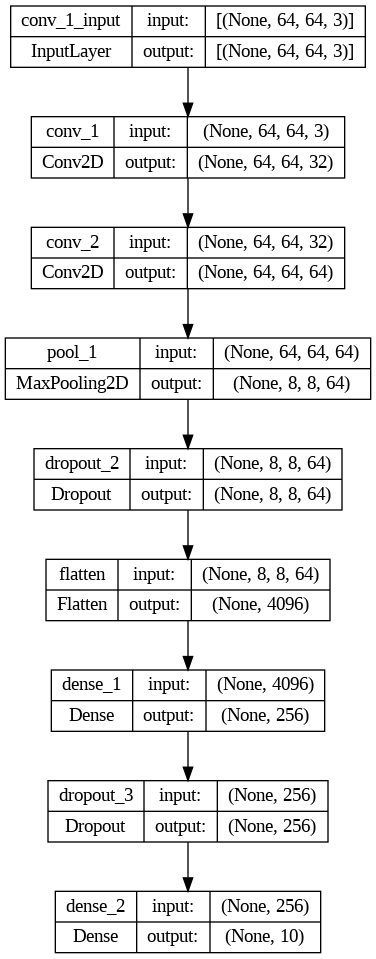

In [38]:
# Plot the model
plot_model(model2, show_shapes=True, show_layer_names=True)

In [40]:
# Train the model and store the results in a variable called history
history = model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
125/125 [==============================] - 64s 507ms/step - loss: 1.7593 - accuracy: 0.3142 - val_loss: 1.4106 - val_accuracy: 0.4480
Epoch 2/50
125/125 [==============================] - 65s 522ms/step - loss: 1.3109 - accuracy: 0.4960 - val_loss: 1.2002 - val_accuracy: 0.5280
Epoch 3/50
125/125 [==============================] - 64s 509ms/step - loss: 1.0940 - accuracy: 0.5987 - val_loss: 1.0006 - val_accuracy: 0.6500
Epoch 4/50
125/125 [==============================] - 64s 512ms/step - loss: 0.9107 - accuracy: 0.6697 - val_loss: 0.9739 - val_accuracy: 0.6590
Epoch 5/50
125/125 [==============================] - 65s 523ms/step - loss: 0.8024 - accuracy: 0.7180 - val_loss: 0.7905 - val_accuracy: 0.7020
Epoch 6/50
125/125 [==============================] - 67s 539ms/step - loss: 0.7405 - accuracy: 0.7350 - val_loss: 0.7419 - val_accuracy: 0.7150
Epoch 7/50
125/125 [==============================] - 62s 497ms/step - loss: 0.7036 - accuracy: 0.7485 - val_loss: 0.6585 - val_ac

In [41]:
# Calculate the test accuracy
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: {acc:0.3f}'.format(acc=score[1]))

Test accuracy: 0.809


## Q8 Explore to improve the model performance using transfer learning from pretrained model

* Use pretrained models from Keras Applications [vgg16 ](https://keras.io/api/applications/vgg/#vgg16-function)

    * Does the model performance improve after the above explorations?
    * How would you further improve the model performance?

In [42]:
from keras.applications import vgg16

conv_base = vgg16.VGG16(include_top=False, input_shape = input_shape)
# freeze the weights
for layer in conv_base.layers:
    layer.trainable = False

model3 = Sequential([
        conv_base,
        Flatten(name='flatten'),
        Dropout(0.2),
        Dense(256, activation='relu',name='dense_1'),
        Dropout(0.2),
        Dense(10,activation='softmax',name='dense_2')
    ])
model3.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [43]:
history = model3.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
125/125 [==============================] - 275s 2s/step - loss: 1.1468 - accuracy: 0.5920 - val_loss: 0.7427 - val_accuracy: 0.7280
Epoch 2/50
125/125 [==============================] - 277s 2s/step - loss: 0.7360 - accuracy: 0.7368 - val_loss: 0.6047 - val_accuracy: 0.7800
Epoch 3/50
125/125 [==============================] - 272s 2s/step - loss: 0.6235 - accuracy: 0.7843 - val_loss: 0.6232 - val_accuracy: 0.7500
Epoch 4/50
125/125 [==============================] - 234s 2s/step - loss: 0.5708 - accuracy: 0.7997 - val_loss: 0.5486 - val_accuracy: 0.8040
Epoch 5/50
125/125 [==============================] - 269s 2s/step - loss: 0.5180 - accuracy: 0.8167 - val_loss: 0.5108 - val_accuracy: 0.8090
Epoch 6/50
125/125 [==============================] - 282s 2s/step - loss: 0.4662 - accuracy: 0.8313 - val_loss: 0.5192 - val_accuracy: 0.8120
Epoch 7/50
125/125 [==============================] - 278s 2s/step - loss: 0.4459 - accuracy: 0.8457 - val_loss: 0.5740 - val_accuracy: 0.8050

In [44]:
# Calculate the test accuracy
score = model3.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: {acc:0.3f}'.format(acc=score[1]))

Test accuracy: 0.844
